## Test Different Seeds

In [22]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
from globalVariables import *
import simpleCNNwithInception as inceptionCNN
import simpleCNN as simpleCNN
import simpleCNNwithInceptionRegression as regressor
from keras.callbacks import CSVLogger
from scipy.ndimage import rotate
from tools import plot_confusion_matrix
from getSIDMdata_generator_meta import get_tf_DataSet as getGenerators_meta
from getSIDMdata_generator import get_tf_DataSet as getGenerators

from glob import glob
from tools import get_best_model,get_predictions_per_subset
import os
from scipy.stats import norm
import scienceplots
plt.style.use(["science", "grid"])

In [3]:
model_name = "inception"

### First get the accuracy of the fiducial model using only z=0.25 clusters

In [52]:
train, test, params = getGenerators_meta(augment_data=True, simulationNames=['CDM','SIDM0.1','SIDM1'], 
                                                      channels=['total','stellar','xray'], 
                                                      allDataFile='pickles/binned_data_20.pkl',
                                                      return_test_params=True)

test_x = test[0][ params['sim'] == 'CDM+baryons'  ]
test_y = test[1][ params['sim'] == 'CDM+baryons'  ]


fid_accuracy = []

for checkpoint_filepath in tqdm(glob("models/%s/*" % model_name)):
    model = tf.keras.models.load_model(checkpoint_filepath)
    loss, acc = model.evaluate(test_x, test_y, verbose=1)
    fid_accuracy.append(acc)

  0%|                                                                                 | 0/10 [00:00<?, ?it/s]/Users/davidharvey/Work/darkCNN/lib/python3.10/site-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


15/15 [==============================] - 1s 69ms/step - loss: 0.3136 - accuracy: 0.9208


 10%|███████▎                                                                 | 1/10 [00:09<01:28,  9.86s/it]/Users/davidharvey/Work/darkCNN/lib/python3.10/site-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


15/15 [==============================] - 1s 64ms/step - loss: 0.2629 - accuracy: 0.9208


 20%|██████████████▌                                                          | 2/10 [00:20<01:21, 10.16s/it]/Users/davidharvey/Work/darkCNN/lib/python3.10/site-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


15/15 [==============================] - 1s 71ms/step - loss: 0.3184 - accuracy: 0.9229


 30%|█████████████████████▉                                                   | 3/10 [00:30<01:10, 10.07s/it]/Users/davidharvey/Work/darkCNN/lib/python3.10/site-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


15/15 [==============================] - 1s 68ms/step - loss: 0.2502 - accuracy: 0.9333


 40%|█████████████████████████████▏                                           | 4/10 [00:40<01:01, 10.29s/it]/Users/davidharvey/Work/darkCNN/lib/python3.10/site-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


15/15 [==============================] - 1s 73ms/step - loss: 0.2824 - accuracy: 0.9167


 50%|████████████████████████████████████▌                                    | 5/10 [00:51<00:52, 10.49s/it]/Users/davidharvey/Work/darkCNN/lib/python3.10/site-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


15/15 [==============================] - 1s 69ms/step - loss: 0.1854 - accuracy: 0.9563


 60%|███████████████████████████████████████████▊                             | 6/10 [01:02<00:42, 10.55s/it]/Users/davidharvey/Work/darkCNN/lib/python3.10/site-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


15/15 [==============================] - 1s 70ms/step - loss: 0.3846 - accuracy: 0.8729


 70%|███████████████████████████████████████████████████                      | 7/10 [01:12<00:31, 10.42s/it]/Users/davidharvey/Work/darkCNN/lib/python3.10/site-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


15/15 [==============================] - 1s 73ms/step - loss: 0.3199 - accuracy: 0.8938


 80%|██████████████████████████████████████████████████████████▍              | 8/10 [01:22<00:20, 10.25s/it]/Users/davidharvey/Work/darkCNN/lib/python3.10/site-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


15/15 [==============================] - 1s 71ms/step - loss: 0.2282 - accuracy: 0.9271


 90%|█████████████████████████████████████████████████████████████████▋       | 9/10 [01:33<00:10, 10.54s/it]/Users/davidharvey/Work/darkCNN/lib/python3.10/site-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


15/15 [==============================] - 1s 69ms/step - loss: 0.2759 - accuracy: 0.9062


100%|████████████████████████████████████████████████████████████████████████| 10/10 [01:43<00:00, 10.39s/it]


#### Now get the accuracy of the new seed

In [ ]:
train, test, params = getGenerators_meta(augment_data=True, simulationNames=['CDM'], 
                                                      channels=['total','stellar','xray'], 
                                                      allDataFile='pickles/binned_data_20_newseed.pkl',
                                                      train_split=0.01, return_test_params=True)

accuracy = []

for checkpoint_filepath in glob("models/%s/*" % model_name):
    model = tf.keras.models.load_model(checkpoint_filepath)
    loss, acc = model.evaluate(test[0],test[1])
    accuracy.append(acc)

#### Save the two lists

In [53]:
filename = 'pickles/newseed.pkl'
pkl.dump([fid_accuracy, accuracy], open(filename, 'wb'))

#### Plot

PDFCROP 1.40, 2020/06/06 - Copyright (c) 2002-2020 by Heiko Oberdiek, Oberdiek Package Support Group.
==> 1 page written on `../plots/newseed.pdf'.
0.9208333492279053 0.8260869383811951


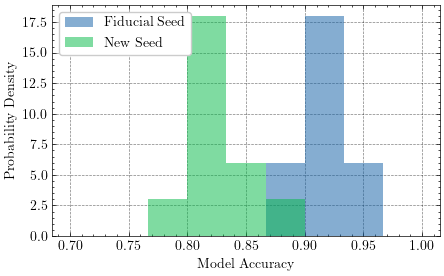

In [54]:
filename = 'pickles/newseed.pkl'
id_accuracy, accuracy = pkl.load(open(filename, 'rb'))
bins = np.linspace(0.7,1.0,10)
fig = plt.figure(figsize=(5,3))
ax = plt.gca()
ax.hist(fid_accuracy,bins=bins, alpha=0.5, density=True, label='Fiducial Seed')
ax.hist(accuracy,bins=bins, alpha=0.5, density=True, label='New Seed')
ax.legend(loc=2)
ax.set_ylabel('Probability Density')
ax.set_xlabel('Model Accuracy')
plot_file = "../plots/newseed.pdf"
plt.savefig(plot_file)
os.system("pdfcrop %s %s" % (plot_file, plot_file))
print(np.median(fid_accuracy), np.median(accuracy))

In [33]:
prob_test_new_seed = [] # A record of the probabilities predicted for seed CDM test set
test_name = 'CDM'

for checkpoint_filepath in glob('models/%s/*' % model_name):
  
    model = get_best_model( train, test, model_name=model_name, checkpoint_filepath=checkpoint_filepath)
    
    
    train, test = getGenerators(augment_data=True, simulationNames=[test_name], train_split=0.01, 
                                                      channels=['total','stellar','xray'], 
                                                      allDataFile='pickles/binned_data_20_newseed.pkl', random_state=i)
    
    prob_test_new_seed.append(model.predict( test[0], verbose=0 ))
    
prob_test_new_seed = np.array(prob_test_new_seed)



Found Model
Found Model
Found Model
Found Model
Found Model
Found Model
Found Model
Found Model
Found Model
Found Model


In [ ]:
prob_test_new_seed = np.array(prob_test_new_seed)


In [ ]:
model_name = 'inception'
prob_test_diff_bar = [] # A record of the probabilities predicted for seed CDM test set
test_name = 'CDM_hi'

for checkpoint_filepath in glob('models/%s/*' % model_name):
  
    model = get_best_model( train, test, model_name=model_name, checkpoint_filepath=checkpoint_filepath)
    
    
    train, test = getGenerators(augment_data=True, simulationNames=[test_name], train_split=0.01, 
                                                      channels=['total','stellar','xray'], 
                                                      allDataFile='pickles/binned_data_20.pkl', random_state=i)
    
    prob_test_diff_bar.append(model.predict( test[0], verbose=0 ))
    
prob_test_diff_bar = np.array(prob_test_diff_bar)



In [ ]:
prob_test_fid = [] # A record of the probabilities predicted for seed CDM test set
test_name = 'CDM'

for checkpoint_filepath in glob('models/%s/*' % model_name):
  
    model = get_best_model( train, test, model_name=model_name, checkpoint_filepath=checkpoint_filepath)
    
    
    train, test = getGenerators(augment_data=True, simulationNames=[test_name], train_split=0.01, 
                                                      channels=['total','stellar','xray'], 
                                                      allDataFile='pickles/binned_data_20.pkl', random_state=i)
    
    prob_test_fid.append(model.predict( test[0], verbose=0 ))
    
prob_test_fid = np.array(prob_test_fid)



In [ ]:
c = ['r','b','g','c','purple']
plt.figure(figsize=(4,3))
names = ['Fiducial','Different AGN','Different Seed']
for i, prob_test in [prob_test_fid, prob_test_diff_bar,prob_test_new_seed]:
    prediction = get_predictions_per_subset( prob_test, 10, cross_sections=[0,0.,0.1,1.0], return_weights=False)
    ax = plt.gca()

    
    mean = np.median(prediction)
    std = np.std(prediction)#/np.sqrt(len(prediction))
    x = np.linspace(-0.1,0.5,1000)
    pdf = norm.pdf(x, mean, std)
    ax.plot(x, pdf, color=c[i])
    if i == 0:
        ylims = ax.get_ylim()
    ax.plot([mean-std,mean-std],[0,ylims[1]*1.1],'--', color=c[i])
    #ax.plot([mean,mean],[0,ylims[1]*1.1],'--', color=c[i])
    #ax.plot([mean+std,mean+std],[0,ylims[1]*1.1],'--', color=c[i])
    ax.fill_between( x[ (x > mean-std) & (x < mean+std) ], 
                    np.zeros(len(x[ (x > mean-std) & (x < mean+std) ])),
                    pdf[ (x > mean-std) & (x < mean+std) ], color=c[i], alpha=0.1)
    ax.plot( [mean-std,mean-std],[0,norm.pdf(mean-std, mean, std)], '-',color=c[i], label=names[i] )
    ax.plot( [mean+std,mean+std],[0,norm.pdf(mean+std, mean, std)], '-',color=c[i])

#ax.set_ylim(0,12)
ax.set_xlim(-0.02,0.1)
#ax.set_xscale('log')
ylim = ax.get_ylim()
#ax.plot([0.1,0.1],[0,ylim[1]*1.1],'k-',label='Blind Truth')
#ax.plot([1,1],[0,ylim[1]*1.1],'k-',label='Blind Truth')
ax.set_ylim(0,100)
ax.legend(loc=1)
ax.set_xlabel(r'$\sigma_{\rm DM}/m$ [cm$^2$/g]')
ax.set_ylabel(r'$p(\sigma_{\rm DM}/m)$')

plt.savefig("../plots/dm_models_different_seed.pdf")
